# Air Quality Analysis

###### 공기의 질에 영향을 미치는 다양한 feature를 분석해 본다. 
###### 회귀분석을 통해 각 변수와 공기질 간의 상관관계를 확인해 본다. 

In [28]:
import warnings
warnings.filterwarnings('ignore')

## Data Preperation

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('AirQualityUCI.csv')
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN


In [30]:
df = df.iloc[:, :-2]
df.shape

(9471, 15)

In [31]:
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [33]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

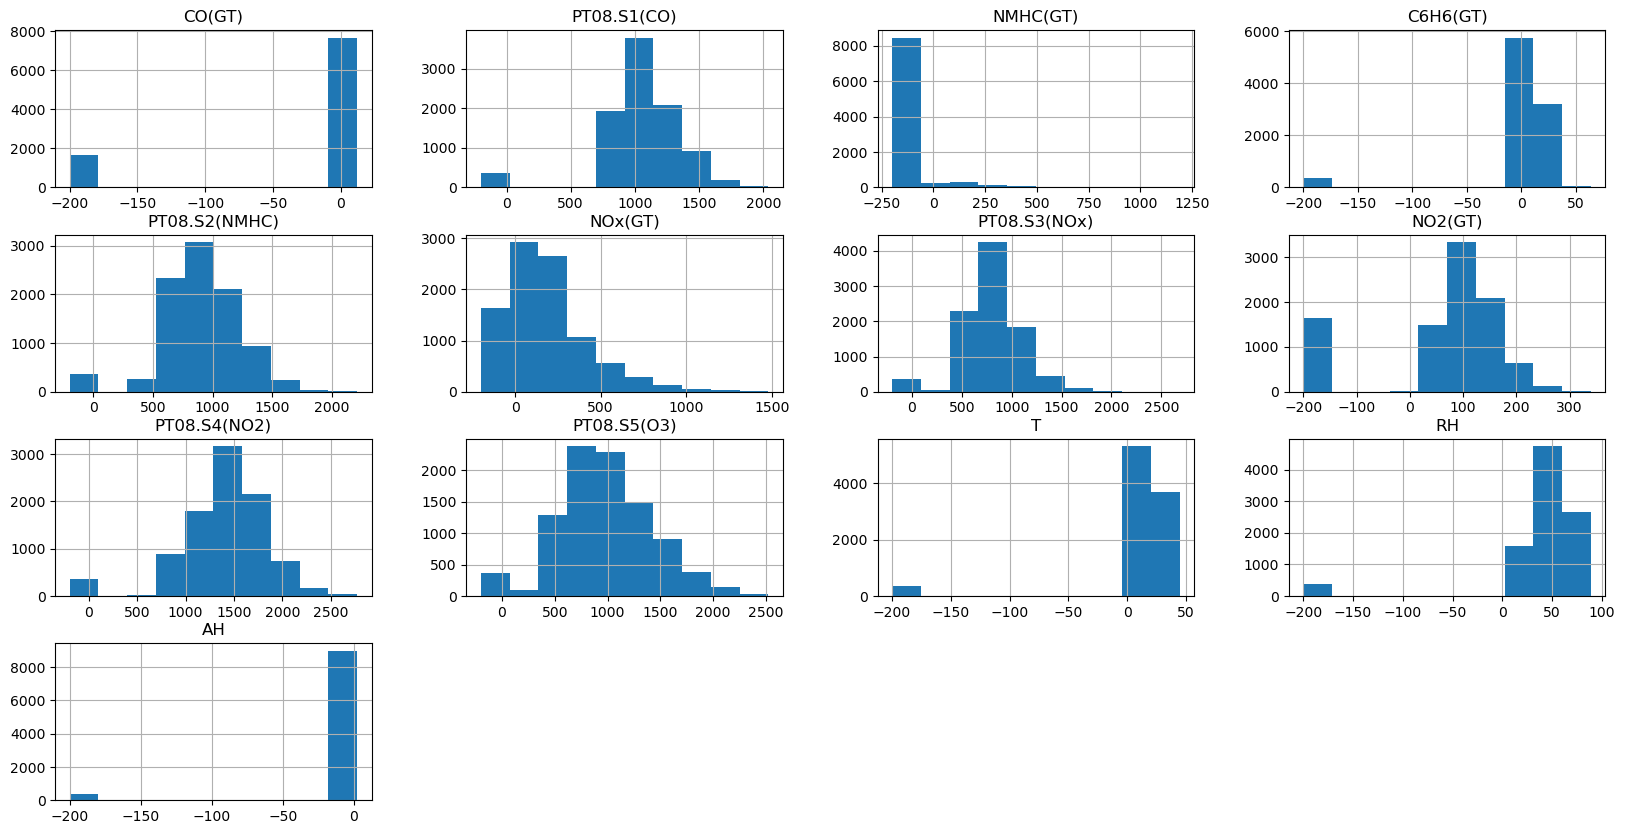

In [34]:
df.drop(['Date'], axis=1).hist(figsize=(20, 10))

In [35]:
df.columns = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

## Data Check & Feature Engineering

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOX_GT        9357 non-null   float64
 8   PT08_S3_NOX   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_O3    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [37]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [38]:
df.isna().sum()

DATE            114
TIME            114
CO_GT           114
PT08_S1_CO      114
NMHC_GT         114
C6H6_GT         114
PT08_S2_NMHC    114
NOX_GT          114
PT08_S3_NOX     114
NO2_GT          114
PT08_S4_NO2     114
PT08_S5_O3      114
T               114
RH              114
AH              114
dtype: int64

In [39]:
df.dropna(how='any').shape

(9357, 15)

In [40]:
df = df.dropna(how='any')

In [41]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('RH')
obj_cols = df.select_dtypes(include=object).columns.tolist()


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in num_cols:
    df[[col]] = scaler.fit_transform(df[[col]])
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03
mean,1.032744e-16,-9.416191e-17,1.214992e-17,0.000000,6.682458e-17,-2.429985e-17,1.214992e-16,4.859970e-17,2.186986e-16,-1.974363e-17,-1.366866e-17,39.485380,-9.112443e-18
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,51.216145,1.000053e+00
min,-2.135042e+00,-3.786940e+00,-2.926701e-01,-4.878576,-3.197626e+00,-1.431966e+00,-3.090259e+00,-2.033730e+00,-3.406529e+00,-2.571759e+00,-4.855832e+00,-200.000000,-4.956111e+00
25%,4.482443e-01,-3.880661e-01,-2.926701e-01,0.051581,-5.363344e-01,-4.607914e-01,-4.906887e-01,-4.056349e-02,-4.419653e-01,-6.020218e-01,2.596437e-02,34.100000,1.932003e-01
50%,4.598343e-01,1.215814e-02,-2.926701e-01,0.145834,1.182314e-03,-1.072837e-01,-3.075281e-03,2.981961e-01,1.166997e-01,-7.238134e-02,1.717933e-01,48.600000,2.005000e-01
75%,4.739999e-01,5.215345e-01,-2.926701e-01,0.283588,6.146524e-01,4.482285e-01,5.124905e-01,5.896869e-01,5.790431e-01,6.126495e-01,3.315106e-01,61.900000,2.086951e-01
max,5.937634e-01,3.004744e+00,9.644258e+00,1.494377,3.854359e+00,5.090445e+00,5.863815e+00,2.220460e+00,2.961396e+00,3.387790e+00,8.060332e-01,88.700000,2.326799e-01


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOX_GT        9357 non-null   float64
 8   PT08_S3_NOX   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_O3    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [46]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df['MONTH'] = df['DATE'].dt.month
df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0]))

In [47]:
df.head(2)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2004-03-10,18:00:00,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,48.9,0.194881,3,18
1,2004-03-10,19:00:00,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,47.7,0.194052,3,19
